In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
def get_device():
    if torch.cuda.is_available():
        return 'cuda'
    elif torch.backends.mps.is_available():
        return 'mps'
    else:
        return 'cpu'

device = get_device()

# Data

In [3]:
x = torch.arange(0, 3000, 2).type(torch.float32).unsqueeze(dim=1).to(device)
y = (x*4).to(device)

print(x)
print(y)

tensor([[0.0000e+00],
        [2.0000e+00],
        [4.0000e+00],
        ...,
        [2.9940e+03],
        [2.9960e+03],
        [2.9980e+03]], device='mps:0')
tensor([[0.0000e+00],
        [8.0000e+00],
        [1.6000e+01],
        ...,
        [1.1976e+04],
        [1.1984e+04],
        [1.1992e+04]], device='mps:0')


In [15]:
train_split = int(len(x)*0.95)

x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

# Model

In [16]:
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(
            in_features=1,
            out_features=6
        )
        self.relu_activation = nn.ReLU()

        self.layer_2 = nn.Linear(
            in_features=6,
            out_features=1
        )
        
    def forward(self, x):
        fp1 = self.layer_1(x)
        a1 = self.relu_activation(fp1)
        output = self.layer_2(a1)
        return output
        

# Training

In [24]:
model = RegressionModel().to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10000
for i in range(num_epochs):
    optimizer.zero_grad()

    output = model(x_train)
    loss = loss_fn(y_train, output)
    loss.backward()

    optimizer.step()
    if (i + 1) % 1000 == 0:
        print(f'Epoch [{i+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1000/10000], Loss: 1527.1849
Epoch [2000/10000], Loss: 0.0052
Epoch [3000/10000], Loss: 0.0076
Epoch [4000/10000], Loss: 0.0061
Epoch [5000/10000], Loss: 0.0064
Epoch [6000/10000], Loss: 0.0065
Epoch [7000/10000], Loss: 0.0060
Epoch [8000/10000], Loss: 0.0060
Epoch [9000/10000], Loss: 0.0051
Epoch [10000/10000], Loss: 0.0057


# Inference

In [18]:
# x_inference = torch.tensor(x_test).unsqueeze(dim=1).to(device)
pred = model(x_test)

# Plotting

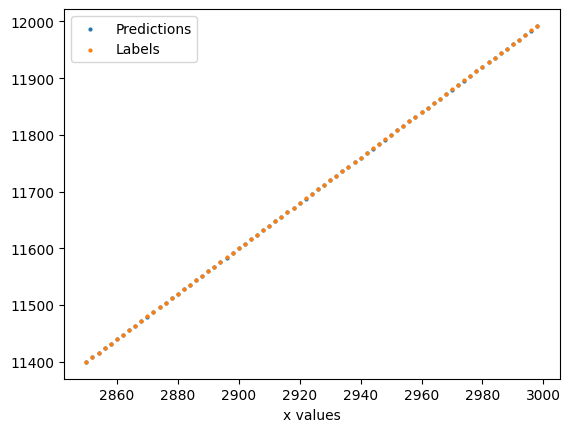

In [23]:
plt.scatter(x_test.cpu(), pred.detach().cpu(), s=4, label='Predictions')
plt.scatter(x_test.cpu(), y_test.cpu(), s= 4, label='Labels')

plt.xlabel('x values')
plt.legend()